In [1]:
import numpy as np
import bokeh as bk
import sympy as sp
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from sympy.solvers import solve, solve_undetermined_coeffs
from scipy.integrate import odeint
from bokeh.palettes import Dark2_5 as palette
import itertools
output_notebook()

Loading BokehJS ...

In [2]:
width = 450
height = 350
colors = itertools.cycle(palette) 

In [3]:
def F(y, p):
    return - 3 - 4 * y + p - y * y + p * y

def model(y, t, p):
    dydt = F(y, p) 
    return dydt

In [4]:
t = np.linspace(0, 50, 90)

plot1 = figure(title='ODE', plot_width=width, plot_height=height)
        
p = np.linspace(-5, 5, 11)
for param in p:
    lwidth = 0.2
    color = 'blue'
    if param >2:
        color = 'red'
        lwidth = 1
    for i in np.linspace(0, 3, 10):
        sol = odeint(model, i, t, args=(param,))
        plot1.line(t, sol[:, 0], color=color, line_width=lwidth)
        
p = np.linspace(-10, 10, 101)

plot2 = figure(title='Bifurcation', plot_width=width, plot_height=height)

plot2.line(p[p<=2], -1)
plot2.scatter(p[p>2], -1, size=1)

plot2.line(p[p>=2], p[p>=2]-3)
plot2.scatter(p[p<2], p[p<2]-3, size=1)
plot2.circle(2, -1)

grid = gridplot([plot1, plot2], ncols=2)

show(grid)

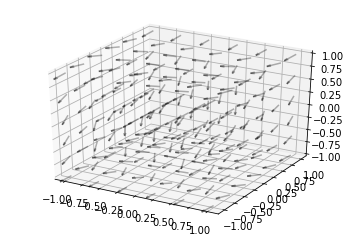

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def f2(x, y, z, a, t):
    dxdt = a * y - z ** 2
    dydt = a * z - x ** 2    
    dzdt = a * x - y ** 2
    return [dxdt, dydt, dzdt]

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(-1, 1, 6)
y = np.linspace(-1, 1, 6)
z = np.linspace(-1, 1, 6)

XX, YY, ZZ = np.meshgrid(x, y, z)
t = 0
u, v, w = np.zeros(XX.shape), np.zeros(YY.shape), np.zeros(ZZ.shape)

NI, NJ, NK = XX.shape

for i in range(NI):
    for j in range(NJ):
        for k in range(NK):
            x = XX[i, j]
            y = YY[i, j]
            z = ZZ[i, j]
            yprime = f2(x, y, z, 0, t)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]
            w[i,j] = yprime[2]

# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_zlim([0, 1])
ax.quiver(XX, YY, ZZ, u, v, w, color='k', alpha=.3, length=.18, normalize=True)
plt.show()